In [1]:
! pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
def read_fasta(file_path):
    sequences = []
    headers = []
    current_sequence = ""

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                if current_sequence:
                    sequences.append(current_sequence)
                    current_sequence = ""
                headers.append(line[1:])
            else:
                current_sequence += line

        if current_sequence:
            sequences.append(current_sequence)

    return headers, sequences

fasta_file = "Influenza/gisaid_epiflu_sequence_Victoria_complete_genomes.fasta"
headers, sequences = read_fasta(fasta_file)

In [ ]:
data = {'Header': headers, 'Sequence': sequences}
df = pd.DataFrame(data)

cols = [df.loc[i]['Header'].split("|") for  i in range(len(df))]
seqs = [df.loc[i]['Sequence'] for i in range(len(df))]

df = pd.DataFrame(cols,columns=['Field_1', 'Field_2', 'Field_3', 'Field_4', 'Field_5', 'Field_6', 'genomic_segments', 'Field_8', 'Field_9', 'Field_10', 'Field_11', 'Field_12','Field_13'])
df['length'] = [len(x) for x in seqs]
df['location'] = [df.loc[i]['Field_1'].split('/')[1] for i in range(len(df))]
df['sequence'] = seqs
df['date'] = [("").join(df.loc[i]['Field_12'].split('-')) for i in range(len(df))]
df['index'] = list(df.index)


In [4]:
def read_fasta(file_path):
    sequences = []
    headers = []
    current_sequence = ""

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                if current_sequence:
                    sequences.append(current_sequence)
                    current_sequence = ""
                headers.append(line[1:])
            else:
                current_sequence += line

        if current_sequence:
            sequences.append(current_sequence)

    return headers, sequences

fasta_file = "Influenza/gisaid_epiflu_sequence_Yamagata_complete_genomes.fasta"
headers, sequences = read_fasta(fasta_file)




In [5]:
# data = {'Header': headers, 'Sequence': sequences}
# df = pd.DataFrame(data)

# cols = [df.loc[i]['Header'].split("|") for  i in range(len(df))]
# seqs = [df.loc[i]['Sequence'] for i in range(len(df))]

# df = pd.DataFrame(cols,columns=['Field_1', 'Field_2', 'Field_3', 'Field_4', 'Field_5', 'Field_6', 'genomic_segments', 'Field_8', 'Field_9', 'Field_10', 'Field_11', 'Field_12','Field_13','Field_14'])
# df['length'] = [len(x) for x in seqs]
# df['location'] = [df.loc[i]['Field_1'].split('/')[1] for i in range(len(df))]
# df['sequence'] = seqs
# df['date'] = [("").join(df.loc[i]['Field_12'].split('-')) for i in range(len(df))]
# df['index'] = list(df.index)

In [6]:
df

,Field_1,Field_2,Field_3,Field_4,Field_5,Field_6,genomic_segments,Field_8,Field_9,Field_10,Field_11,Field_12,Field_13,Field_14,length,location,sequence,date,index
0,B/Houston/1/91,EPI_ISL_1221,B_/_H0N0,,Yamagata,,HA,4,B/Houston/1/91,5587,AF129896,1991-01-01,1991-01-01,None,1752,Houston,atgaaggcaataattgtactactcatggtagtaacatccaacgcag...,19910101,0
1,B/Houston/1/91,EPI_ISL_1221,B_/_H0N0,,Yamagata,,NA,6,B/Houston/1/91,5614,AF129909,1991-01-01,1991-01-01,None,1405,Houston,atgaacaatgctaccttcaactatacaaacgttaactctatttctc...,19910101,1
2,B/Jiangsu/10/03,EPI_ISL_2839,B_/_H0N0,,Yamagata,,PA,3,B/Jiangsu/10/03,13329,AJ716226,2003-01-01,2003-01-01,None,2153,Jiangsu,gatacttttattacaagaaacttccagactacaataatacaaaagg...,20030101,2
3,B/Jiangsu/10/03,EPI_ISL_2839,B_/_H0N0,,Yamagata,,PB1,2,B/Jiangsu/10/03,13375,AJ781191,2003-01-01,2003-01-01,None,2223,Jiangsu,ctcttcatagatgtacccatacaggcagcaatttcaacaacattcc...,20030101,3
4,B/Jiangsu/10/03,EPI_ISL_2839,B_/_H0N0,,Yamagata,,PB2,1,B/Jiangsu/10/03,13417,AJ781212,2003-01-01,2003-01-01,None,2290,Jiangsu,aaaattgaattgttgaaacaactgttaagggacaatgaagccaaaa...,20030101,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57767,B/Guangxi-Xiangshan/11016/2019,EPI_ISL_377017,B_/_H0N0,C1+C1,Yamagata,,NP,5,2019-CX2138.5,1810590,,2019-06-17,2019-06-17,None,1844,Guangxi-Xiangshan,agcagaagcacagcattttcttgtgaacttcaagcaccagtaaaag...,20190617,57767
57768,B/Anhui-Huashan/11127/2019,EPI_ISL_367333,B_/_H0N0,C2,Yamagata,,NP,5,2019-CX1953.5,1810676,,2019-05-20,2019-05-20,None,1844,Anhui-Huashan,agcagaagcacagcattttcttgtgaacttcaagcaccagtaaaag...,20190520,57768
57769,B/Yunnan-Linxiang/1550/2019,EPI_ISL_377016,B_/_H0N0,C1+C1,Yamagata,,NS,8,2019-CX2139.8,1811383,,2019-06-24,2019-06-24,None,1087,Yunnan-Linxiang,gaggatttatttagtcactggcaaacaggaaaaatggcggacaata...,20190624,57769
57770,B/Guangxi-Xiangshan/11016/2019,EPI_ISL_377017,B_/_H0N0,C1+C1,Yamagata,,NS,8,2019-CX2138.8,1811384,,2019-06-17,2019-06-17,None,1096,Guangxi-Xiangshan,agcagaagcagaggatttgtttagtcactggcaaacaggaaaatgg...,20190617,57770


In [ ]:
genes = list(set(df['genomic_segments']))

for gene in genes:
    subset = df.loc[df.genomic_segments==gene]['length']
    print(gene,sum(subset)/len(subset))

# Influenza B Victoria Lineage Data

## Genes

### HA (Hemagglutinin): 
Hemagglutinin is a surface glycoprotein responsible for the attachment of the virus to host cells. It plays a crucial role in the virus's ability to infect cells and is a major target for the immune system's antibodies.

### MP (Matrix Protein): 
The Matrix protein is involved in the assembly of the virus particles and plays a role in virus budding and release from infected cells. It helps in maintaining the structural integrity of the virus.

### NA (Neuraminidase): 
Neuraminidase is another surface glycoprotein that enables the release of new viral particles from infected cells and facilitates the spread of the virus within the respiratory tract. It also helps the virus evade the host immune response.

### NP (Nucleoprotein): 
Nucleoprotein binds to the viral RNA to form a ribonucleoprotein complex (RNP), which is the basic structural unit of the viral genome. It is involved in viral replication and transcription.

### NS (Non-structural Protein): 
The Non-structural protein plays a role in inhibiting the host immune response and modulating the infected cell's metabolism to favor viral replication. It also plays a role in the assembly of new viral particles.

### PA (Polymerase Acid): 
The Polymerase Acid is one of the subunits of the viral RNA polymerase complex. It is involved in the replication and transcription of the viral genome.

###  PB1 (Polymerase Basic 1): 
The Polymerase Basic 1 is another subunit of the viral RNA polymerase complex. It works together with PA and PB2 to form the functional RNA polymerase complex, responsible for viral genome replication and transcription.

###  PB2 (Polymerase Basic 2):
The Polymerase Basic 2 is the third subunit of the viral RNA polymerase complex. It is involved in recognizing and binding to host cell factors necessary for viral replication.

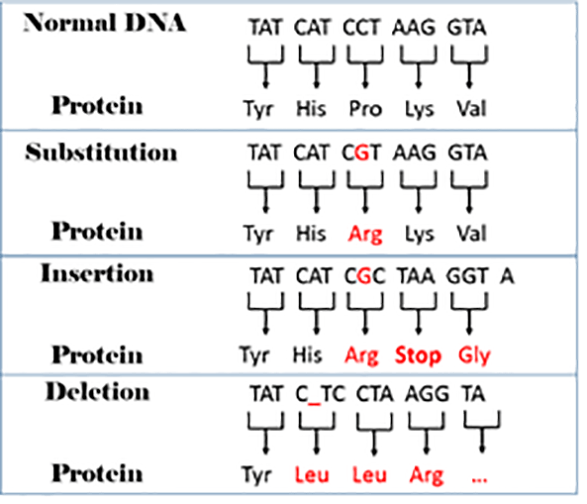

# Defining a mutation in the data

## Need to match sequences with the same characteristics to properly determine a match
* Location
* gene
* type (Field_4)
* length within (x base pairs)



## Example

In [ ]:
# Alaska 
# NA
# Original
df.loc[(df.location=='Alaska') & (df.genomic_segments=='HA') & (df.Field_4=='Original')].sort_values(by='Field_12')


# Base Sequence

Index 2

In [ ]:
base_seq = df.loc[2]
base_location = base_seq['location']
base_segment = base_seq['genomic_segments']
base_type = base_seq['Field_4']
base_len = base_seq['length']
base_date = base_seq['date']
base_index = base_seq['index']
base_sequence = base_seq['sequence']

In [ ]:
print(base_sequence)

In [ ]:
match = df.loc[(df.location==base_location) & 
               (df.genomic_segments==base_segment) & 
               (df.Field_4==base_type) & 
               (df.date>=base_date) & 
               (df.index!=base_index) & 
               (df.length.isin(range(base_len-10,base_len+10)))].sort_values(by='date').reset_index(drop=True).head(1)              
                                                                                                                              



In [ ]:
if((len(match)==1) and (match.loc[0]['length'] == base_len) and (base_sequence != match.loc[0]['sequence'])):
    print(base_index,match.loc[0]['index'])
else:
    print('no match')

# Finding Mutation Pairs

Takes a long time to run so that why i commented out and saved into a dataframe

In [ ]:
HA = df.loc[df.genomic_segments == 'HA'].reset_index(drop=True)

In [ ]:
HA

In [7]:
mutation_pairs = []
for i in range(len(df)):
    base_seq = df.loc[i]
    base_location = base_seq['location']
    base_segment = base_seq['genomic_segments']
    base_type = base_seq['Field_4']
    base_len = base_seq['length']
    base_date = base_seq['date']
    base_index = base_seq['index']
    base_sequence = base_seq['sequence']
    
    match = df.loc[(df.location==base_location) & 
               (df.genomic_segments==base_segment) & 
               (df.Field_4==base_type) & 
               (df.date>=base_date) & 
               (df.index!=base_index) & 
               (df.length.isin(range(base_len-10,base_len+10)))].sort_values(by='date').reset_index(drop=True).head(1)              
                                                                                                                              
    if((len(match)==1) and (base_sequence != match.loc[0]['sequence'])):
        mutation_pairs.append([base_sequence,match.loc[0]['sequence']])
        

In [8]:
mutation_pairs_df = pd.DataFrame(mutation_pairs,columns=['base','mutated'])   

In [9]:
mutation_pairs_df

,base,mutated
0,atgaaggcaataattgtactactcatggtagtaacatccaatgcag...,atgaaggcaataattgtactactcatggtagtaacatccaatgcag...
1,atgaaggcaataattgtactactcatggtagtaacatccaatgcag...,atgaaggcaataattgtactactcatggtagtaacatccaatgcag...
2,atgtcgctgtttggagacacaattgcctacctgctttcattgacag...,atgtcgctgtttggagacacaattgcctacctgctttcattgacag...
3,atgtcgctgtttggagacacaattgcctacctgctttcattgacag...,atgtcgctgtttggagacacaattgcctacctgctttcattgacag...
4,atgaacaatgctaccttcaactatacaaacgttaaccctatttctc...,atgaacaatgctaccttcaactatacaaacgttaaccctatttctc...
...,...,...
44830,atcttctcaaaaaactgaggcaaataggccaaaaatgaacaatgct...,atcttctcaaaaactgaggcaaataggccaaaaatgaacaatgcta...
44831,attttctaatatccacaaaatgaaggcaataattgtactactcatg...,attttctaatatccacaaaatgaaggcaataattgtactactcatg...
44832,atgtccaacatggatattgacggtataaatactgggacaatcgaca...,atgtccaacatggatattgacggtataaatactgggacaatcgaca...
44833,atgacattggctaaaattgaattgttaaagcaactgttaagggaca...,atgacattggctaaaattgaattgttaaagcaactgttaagggaca...


In [10]:
mutation_pairs_df.to_csv('yamagata_seq_to_seq.csv',index=False)

In [11]:
df

,Field_1,Field_2,Field_3,Field_4,Field_5,Field_6,genomic_segments,Field_8,Field_9,Field_10,Field_11,Field_12,Field_13,Field_14,length,location,sequence,date,index
0,B/Houston/1/91,EPI_ISL_1221,B_/_H0N0,,Yamagata,,HA,4,B/Houston/1/91,5587,AF129896,1991-01-01,1991-01-01,None,1752,Houston,atgaaggcaataattgtactactcatggtagtaacatccaacgcag...,19910101,0
1,B/Houston/1/91,EPI_ISL_1221,B_/_H0N0,,Yamagata,,NA,6,B/Houston/1/91,5614,AF129909,1991-01-01,1991-01-01,None,1405,Houston,atgaacaatgctaccttcaactatacaaacgttaactctatttctc...,19910101,1
2,B/Jiangsu/10/03,EPI_ISL_2839,B_/_H0N0,,Yamagata,,PA,3,B/Jiangsu/10/03,13329,AJ716226,2003-01-01,2003-01-01,None,2153,Jiangsu,gatacttttattacaagaaacttccagactacaataatacaaaagg...,20030101,2
3,B/Jiangsu/10/03,EPI_ISL_2839,B_/_H0N0,,Yamagata,,PB1,2,B/Jiangsu/10/03,13375,AJ781191,2003-01-01,2003-01-01,None,2223,Jiangsu,ctcttcatagatgtacccatacaggcagcaatttcaacaacattcc...,20030101,3
4,B/Jiangsu/10/03,EPI_ISL_2839,B_/_H0N0,,Yamagata,,PB2,1,B/Jiangsu/10/03,13417,AJ781212,2003-01-01,2003-01-01,None,2290,Jiangsu,aaaattgaattgttgaaacaactgttaagggacaatgaagccaaaa...,20030101,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57767,B/Guangxi-Xiangshan/11016/2019,EPI_ISL_377017,B_/_H0N0,C1+C1,Yamagata,,NP,5,2019-CX2138.5,1810590,,2019-06-17,2019-06-17,None,1844,Guangxi-Xiangshan,agcagaagcacagcattttcttgtgaacttcaagcaccagtaaaag...,20190617,57767
57768,B/Anhui-Huashan/11127/2019,EPI_ISL_367333,B_/_H0N0,C2,Yamagata,,NP,5,2019-CX1953.5,1810676,,2019-05-20,2019-05-20,None,1844,Anhui-Huashan,agcagaagcacagcattttcttgtgaacttcaagcaccagtaaaag...,20190520,57768
57769,B/Yunnan-Linxiang/1550/2019,EPI_ISL_377016,B_/_H0N0,C1+C1,Yamagata,,NS,8,2019-CX2139.8,1811383,,2019-06-24,2019-06-24,None,1087,Yunnan-Linxiang,gaggatttatttagtcactggcaaacaggaaaaatggcggacaata...,20190624,57769
57770,B/Guangxi-Xiangshan/11016/2019,EPI_ISL_377017,B_/_H0N0,C1+C1,Yamagata,,NS,8,2019-CX2138.8,1811384,,2019-06-17,2019-06-17,None,1096,Guangxi-Xiangshan,agcagaagcagaggatttgtttagtcactggcaaacaggaaaatgg...,20190617,57770


In [ ]:
mutation_pairs = []
for i in range(len(df)):
    base_seq = df.loc[i]
    base_location = base_seq['location']
    base_segment = base_seq['genomic_segments']
    base_type = base_seq['Field_4']
    base_len = base_seq['length']
    base_date = base_seq['date']
    base_index = base_seq['index']
    base_sequence = base_seq['sequence']
    
    match = df.loc[(df.location==base_location) & 
               (df.genomic_segments==base_segment) & 
               (df.Field_4==base_type) & 
               (df.date>=base_date) & 
               (df.index!=base_index) & 
               (df.length.isin(range(base_len-10,base_len+10)))].sort_values(by='date').reset_index(drop=True).head(1)              
                                                                                                                              
    if((len(match)==1) and (match.loc[0]['length'] == base_len) and (base_sequence != match.loc[0]['sequence'])):
        mutation_pairs.append([base_index,match.loc[0]['index']])

mutation_pairs_df = pd.DataFrame(mutation_pairs,columns=['base','mutated'])   

In [ ]:
mutation_pairs_df.to_csv('mutation_pairs.csv')

In [ ]:
index_pairs = pd.read_csv('mutation_pairs.csv')
index_pairs = index_pairs.iloc[:,1:]

## Example

In [ ]:
seq1 = df.loc[68080]['sequence']
seq2 = df.loc[68074]['sequence']

In [ ]:
for i in range(len(seq1)):
    if(seq1[i]!=seq2[i]):
        print(f'{i} {seq1[i]} mutated to {seq2[i]}')

In [ ]:
seq1

# Collecting Training Data

In [ ]:
inputs = []
outputs = []
print(len(index_pairs))
for i in range(len(index_pairs)):
    if(i%1000==0): print(i)
    b_idx = index_pairs.loc[i]['base']
    m_idx = index_pairs.loc[i]['mutated']

    seq1 = df.loc[b_idx]['sequence']
    seq2 = df.loc[m_idx]['sequence']

    max_len = 50
    for i in range(len(seq1)-1):
        mutation = ''
        if(seq1[i]!=seq2[i]):
            mutation = seq2[i]
        else:
            mutation = 'none'
        inputs.append(seq1[max(0,i-max_len):i+1])
        outputs.append(mutation)

pd.DataFrame(inputs).to_csv('inputs.csv',index=False)
pd.DataFrame(outputs).to_csv('outputs.csv',index=False)

In [ ]:
inputs = pd.read_csv("inputs.csv")
outputs = pd.read_csv("outputs.csv")